Challenge 1

Success measure criterion --> Impact of service to increase restaurant's customers

Impact measure criterion:
    1. Compare sales before vs after picture posted
    3. Compare quality of home made pictures with pro pictures -- The gap has decreased due to improvements and availability of technology and free tutorials
    4. Since COVID more people order online --> Easier to sell food and then less need of high quality presentation? Or in the oder way higher standards?
    5. Evolution of maintenance cost for photografy service

Implementation:
    Global:
        For each year from 2001 to 2023: Number of subs to the service / Number of subscription to just eat --> Regression for the next X years
        Evolution of the overall deployment and maintenance cost of the service --> regression for the next X years
    Sample of restaurants divided by geographical criterion (maybe target, type of food):
        Ratings (stars) of the service   
        Percentage of sell increase with respect to before
    Sample of customers divided by geographical criterion, target, type of food:
        Percentage of orders coming from restaurant using photo service
        Importance of picture criterion with respect to cost, qaulity and service criterion

Avoid Bias by:
    Create balanced dataset -- Balance by geographical areas, by price range
    Normalization
    K-Folding??

    

Punto 2: Semplice RNN con dataset etichettato.

Etichettatura multipla --> Softmax come attivazione finale

0: “Both are the same”
1: “They differ”
2: “I don’t know”

Come gestire il fatto che lo stesso percorso possa essere etichettato in maniera differente da 2 o + persone? Devo trovare un criterio per scegliere quale etichetta tenere. (Qual'è l'etichetta con la percentuale maggiore sullo stesso percorso?)

Attenzione real e estimated routes no hanno per forza la stessa lunghezza

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

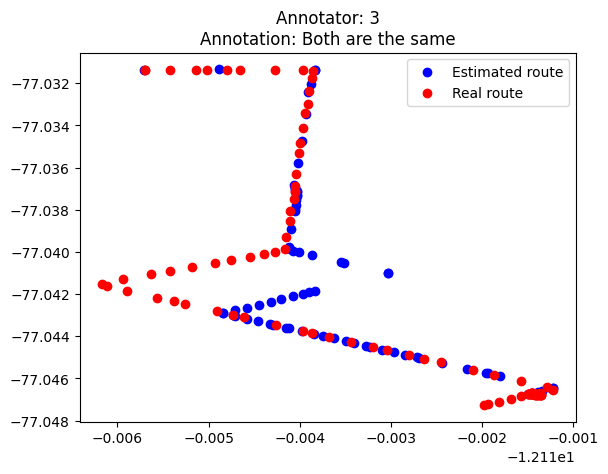

In [1]:
#Load json to dataframe
df = pd.read_json('challenge_dataset.json')

#Print a sample of real and estimated route
df_sample=df.iloc[0]
df_estimated = pd.DataFrame(df_sample['estimated_route'], columns=['Lat','Long'])
df_real = pd.DataFrame(df_sample['real_route'], columns=['Lat','Long'])
# plt.plot(df_estimated['Lat'], df_estimated['Long'], color='b')
# plt.plot(df_real['Lat'], df_real['Long'], color='r')
plt.scatter(df_estimated['Lat'], df_estimated['Long'], color='b')
plt.scatter(df_real['Lat'], df_real['Long'], color='r')
plt.title('Annotator: ' + str(df_sample['annotator'])+'\n'+'Annotation: '+str(df_sample['annotation']))
plt.legend(['Estimated route','Real route'])

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        # Convolution layer C1: 1 input image channel, 6 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a Tensor with size (N, 6, 28, 28), where N is the size of the batch
        c1 = F.relu(self.conv1(input))
        # Subsampling layer S2: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 6, 14, 14) Tensor
        s2 = F.max_pool2d(c1, (2, 2))
        # Convolution layer C3: 6 input channels, 16 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a (N, 16, 10, 10) Tensor
        c3 = F.relu(self.conv2(s2))
        # Subsampling layer S4: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 16, 5, 5) Tensor
        s4 = F.max_pool2d(c3, 2)
        # Flatten operation: purely functional, outputs a (N, 400) Tensor
        s4 = torch.flatten(s4, 1)
        # Fully connected layer F5: (N, 400) Tensor input,
        # and outputs a (N, 120) Tensor, it uses RELU activation function
        f5 = F.relu(self.fc1(s4))
        # Fully connected layer F6: (N, 120) Tensor input,
        # and outputs a (N, 84) Tensor, it uses RELU activation function
        f6 = F.relu(self.fc2(f5))
        # Gaussian layer OUTPUT: (N, 84) Tensor input, and
        # outputs a (N, 10) Tensor
        output = self.fc3(f6)
        return output


net = Net()
print(net)